# Week 4 Project
    - numpy & matplotlib
    - sklearn: onehot encoder, logistic regression, random forests, decision trees
    - confusion matrix, classification report
    - visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Part 1: Loading the Dataset; Preliminary Analysis
Load the data and view the size and distributions by table of cover_type.

In [2]:
fc = pd.read_csv('forest_cover.txt', sep = '\t')
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


Determine the shape of the dataframe to know the number of features and records.

In [3]:
fc.shape

(15120, 13)

Inspect the distribution of the cover types using value_counts.
I considered making a string list of the cover types here for graphs, but I thought they would be messy.  I would definitely do it for a presentation.

In [4]:
fc['Cover_Type'].value_counts().sort_index()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

List of colors to represent the cover types in later coding is created.

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold',\
    'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
Determine the distributions of cover type by wilderness area.

In [6]:
fc['Wilderness_Area'].value_counts().sort_index()

Wilderness_Area
Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: count, dtype: int64

Create a dataframe showing the cover type by wilderness area.

In [7]:
ct_by_wa = pd.crosstab(fc['Cover_Type'], fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


Create a stacked bar chart of the cover type by wilderness area to better visualize the distribution.

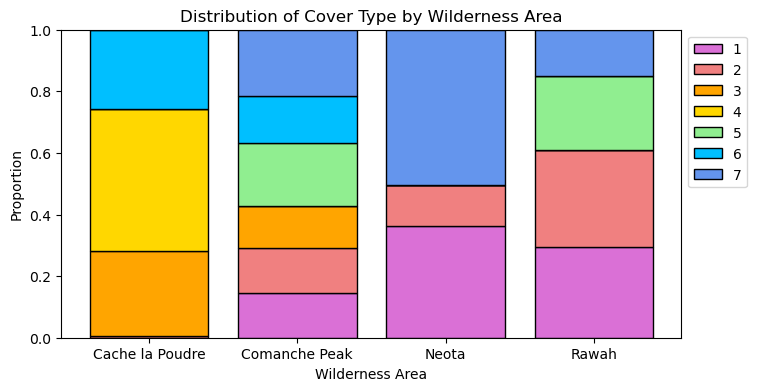

In [8]:
ct_by_wa_props = ct_by_wa / ct_by_wa.sum()
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

plt.figure(figsize = [8, 4])
for i in range(len(ct_by_wa_props)):
    plt.bar(ct_by_wa_props.columns, ct_by_wa_props.values[i],\
            bottom = bb.values[i], edgecolor = 'black',\
            color = palette[i])
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.legend(ct_by_wa.index, bbox_to_anchor = (1, 1))
plt.title('Distribution of Cover Type by Wilderness Area')
plt.show()

## Part 3: Distribution of Cover Type by Soil Type
Determine the distributions of cover type by soil type.

In [9]:
ct_by_st = pd.crosstab(fc['Cover_Type'], fc['Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


Create a stacked bar chart of the cover type by soil type to better visualize the distribution.

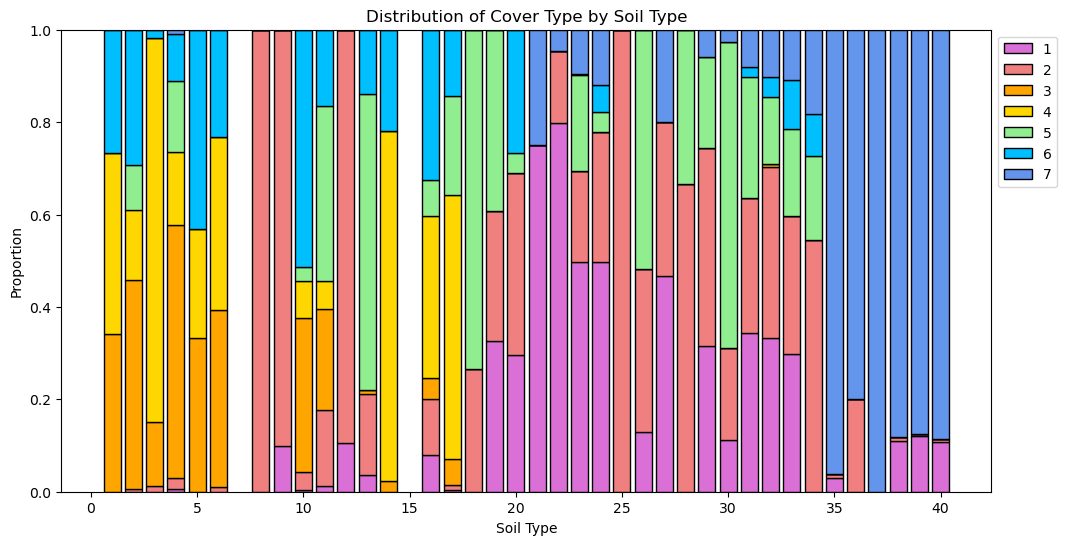

In [10]:
ct_by_st_props = ct_by_st / ct_by_st.sum()
bb = np.cumsum(ct_by_st_props) - ct_by_st_props

plt.figure(figsize = [12, 6])
for i in range(len(ct_by_st_props)):
    plt.bar(ct_by_st_props.columns, ct_by_st_props.values[i],\
            bottom = bb.values[i], edgecolor = 'black',\
            color = palette[i])
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.legend(ct_by_st.index, bbox_to_anchor = (1, 1))
plt.title('Distribution of Cover Type by Soil Type')
plt.show()

## Part 4: Distribution of Elevation by Cover Type
Calculate the average elevation for each cover types. 

In [11]:
fc[['Elevation', 'Cover_Type']].groupby('Cover_Type').mean()

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


Create histograms to visualize the distribution of of elevations by cover type.

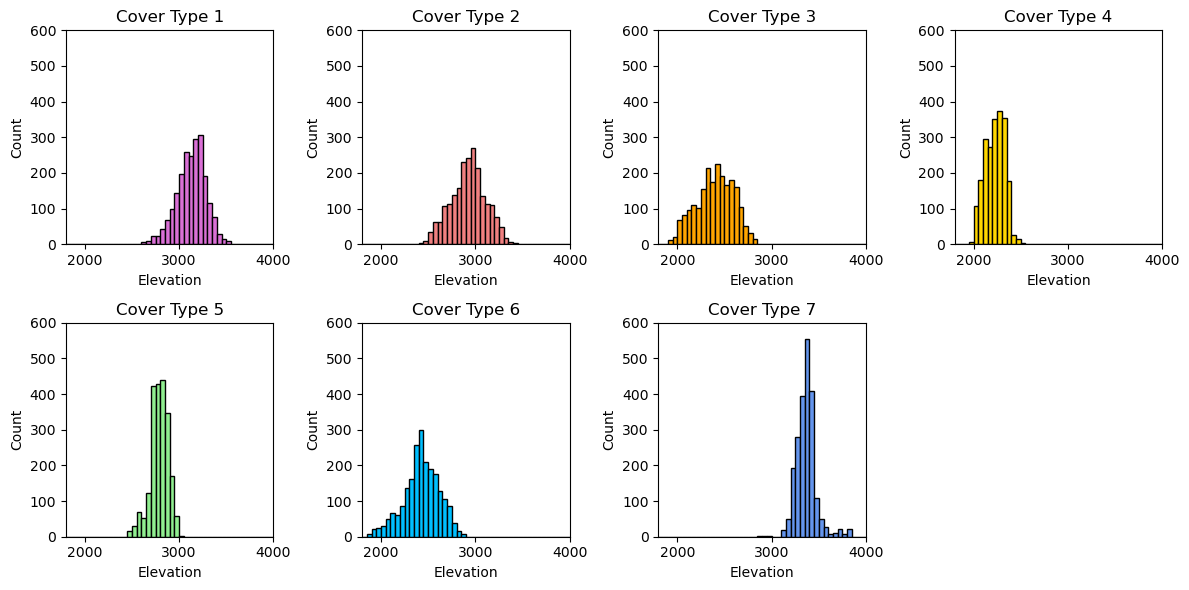

In [12]:
plt.figure(figsize = [12, 6])
for i in range(1, 8):
    plt.subplot(2, 4, i)
    plt.hist(fc[fc['Cover_Type'] == i]['Elevation'],\
        bins = np.arange(1800, 4050, 50), color = palette[i - 1],\
        edgecolor = 'black')
    plt.xlim([1800, 4000])
    plt.ylim([0, 600])
    plt.xlabel('Elevation')
    plt.ylabel('Count')
    plt.title(f'Cover Type {i}')
plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets
Separate the categorical and numerical features and labels into arrays.

In [13]:
X_num = fc[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']].values#.reshape(-1,1)
X_cat = fc[['Wilderness_Area', 'Soil_Type']].values#.reshape(-1,1)
y = fc['Cover_Type'].values#.reshape(-1,1)

print(f' Numerical Feature Array Shape:   {X_num.shape}\
     \n Categorical Feature Array Shape: {X_cat.shape}\
     \n Label Array Shape:               {y.shape}')

 Numerical Feature Array Shape:   (15120, 10)     
 Categorical Feature Array Shape: (15120, 2)     
 Label Array Shape:               (15120,)


Use one-hot encoding to encode the categorical variables.

In [14]:
encoder = OneHotEncoder(sparse = False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)

print(f'Encoded Feature Array Shape: {X_enc.shape}')

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

Combine the numerical features with the encoded features.

In [ ]:
X = np.hstack((X_num, X_enc))
print(f'Feature Array Shape: {X.shape}')

Split the data into training, validation, and test sets using a 70/15/15 division.

In [ ]:
X_train, X_hold, y_train, y_hold = \
    train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

X_valid, X_test, y_valid, y_test = \
    train_test_split(X_hold, y_hold, test_size = 0.5, random_state = 1, stratify = y_hold)

print(f' Training Features Shape:   {X_train.shape}\n \
Validation Features Shape: {X_valid.shape}\n \
Test Features Shape:       {X_test.shape}')

## Part 6: Logistic Regression Model
Create a logistic regression model and determine its training and validation accuracies.

In [ ]:
lr = LogisticRegression(solver = 'lbfgs', max_iter = 14010,\
    multi_class = 'multinomial', penalty = 'none')
lr.fit(X_train, y_train)

print(f' Training Accuracy: {np.round(lr.score(X_train, y_train), 10)}\n \
Testing Accuracy:  {np.round(lr.score(X_test, y_test), 10)}')

## Part 7: Decision Tree Models
Create a decision tree model and determine its training and test accuracies.

In [ ]:
dt_train_acc = []
dt_valid_acc = []

depth_range = list(range(2, 31, 1))

for i in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth = i)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))
    
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

np.random.seed(1)
tree = DecisionTreeClassifier(max_depth = dt_opt_depth)
tree.fit(X_train, y_train)
print(f' Optimal Value for max_depth:           {dt_opt_depth} \n \
Training Accuracy for Optimal Model:   {np.round(tree.score(X_train, y_train), 4)}\n \
Validation Accuracy for Optimal Model: {np.round(tree.score(X_valid, y_valid), 4)}')

Plot the training and validation curves as a function of max_depth.

In [ ]:
plt.figure(figsize = [10, 6])
plt.plot(depth_range, dt_train_acc, label = 'Training')
plt.plot(depth_range, dt_valid_acc, label = 'Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Depth Hyperparameter')
plt.legend()
plt.grid()
plt.show()

## Part 8: Random Forest Models
Create a random forest model and determine its training and test accuracies.

In [ ]:
rf_train_acc = []
rf_valid_acc = []

for i in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators = 100, max_depth = i)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))
    
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

np.random.seed(1)
forest = RandomForestClassifier(n_estimators = 100, max_depth = rf_opt_depth)
forest.fit(X_train, y_train)

print(f' Optimal Value for max_depth:           {rf_opt_depth} \n \
Training Accuracy for Optimal Model:   {np.round(forest.score(X_train, y_train), 4)}\n \
Validation Accuracy for Optimal Model: {np.round(forest.score(X_valid, y_valid), 4)}')

Plot the training and validation curves as a function of max_depth.

In [ ]:
plt.figure(figsize = [10, 6])
plt.plot(depth_range, rf_train_acc, label = 'Training')
plt.plot(depth_range, rf_valid_acc, label = 'Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Depth Hyperparameter')
plt.legend()
plt.grid()
plt.show()

## Part 9: Create and Evaluate Final Model 
Use the random forest model as the final model after ananyzing results below.

Logistic Model:  
                        Training Accuracy: 0.6792   
                        Testing Accuracy:  0.6922
                        
Decision Tree:     
    Training Accuracy for Optimal Model:   0.9804   
    Validation Accuracy for Optimal Model: 0.772  
    
Random Forest:  
    Training Accuracy for Optimal Model:   1.0  
    Validation Accuracy for Optimal Model: 0.8677

In [ ]:
np.random.seed(1)
final_model = RandomForestClassifier(n_estimators = 100, max_depth = 28)
final_model.fit(X_train, y_train)

print(f' Training Accuracy for Final Model:   {np.round(final_model.score(X_train, y_train), 4)}\n \
Validation Accuracy for Final Model: {np.round(final_model.score(X_valid, y_valid), 4)}\n \
Testing Accuracy for Final Model:    {np.round(final_model.score(X_test, y_test), 4)}')

Create and display a confusion matrix of the final model's performance on the test set.

In [ ]:
test_pred = final_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, test_pred)
conf_matrix = pd.DataFrame(conf_matrix,\
    index = [[1, 2, 3, 4, 5, 6, 7]], columns = [[1, 2, 3, 4, 5, 6, 7]])
conf_matrix

Generate a classification report to view the final model's performance on the test set. 

In [ ]:
print(classification_report(y_test, test_pred,\
    target_names = ['1', '2', '3', '4', '5', '6', '7']))